<a href="https://colab.research.google.com/github/fmbento/Jupyter-Notebooks_ad-hoc-solutions/blob/main/Video%20para%20%20Audio%20para%20Texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this only if these 2 modules aren't yet installed
!pip install youtube-dl ffmpeg

In [ ]:
# ... same for these 2 modules
!pip3 install SpeechRecognition pydub

## 0. Download / extract audio from youtube videos 
... that will serve as examples

In [ ]:
# Exemplo EN
!rm audio.wav
!youtube-dl --extract-audio --audio-format wav -o audioEN_in.wav https://www.youtube.com/watch?v=BHtDLadc7Fo

In [ ]:
# On local JNB server:
import subprocess
command = 'ffmpeg -i /home/jovyan/audioEN_in.wav -ab 160k -ar 44100 -vn /home/jovyan/audioEN.wav'
subprocess.call(command, shell=True)

In [14]:
# On Google Colab or any other Cloud based JNB server:
import subprocess
command = 'ffmpeg -i audioEN_in.wav -ab 160k -ar 44100 -vn audioEN.wav'
subprocess.call(command, shell=True)

0

In [7]:
# Exemplo PT
!rm audioPT.wav
!youtube-dl --extract-audio --audio-format wav -o audioPT_in.wav https://www.youtube.com/watch?v=r8y571SrVe4

[download] 100% of 8.42MiB in 02:09
[ffmpeg] Correcting container in "audioPT_in.wav"
[ffmpeg] Post-process file audioPT_in.wav exists, skipping


In [8]:
# On local JNB server:
command = 'ffmpeg -i /home/jovyan/audioPT_in.wav -ab 160k -ar 44100 -vn /home/jovyan/audioPT.wav'
subprocess.call(command, shell=True)

1

In [15]:
# On Google Colab or any other Cloud based JNB server:
command = 'ffmpeg -i audioPT_in.wav -ab 160k -ar 44100 -vn audioPT.wav'
subprocess.call(command, shell=True)

0

## 1. Extrair o Audio para um ficheiro "audio.wav" (de um ficheiro local)

In [9]:
# import subprocess
# command = 'ffmpeg -i /home/jovyan/2023-01-11.mp4 -ab 160k -ar 44100 -vn /home/jovyan/audio.wav'
#subprocess.call(command, shell=True)

## 2. Iniciar o Recognizer

In [16]:
import speech_recognition as sr
# initialize the recognizer
r = sr.Recognizer()

## 3. Função que divide o ficheiro audio em pedaços de alguns segundos 
#### (detecção de frases) e faz o respectivo reconhecimento de cada pedaço
Deste modo não é necessário fazer o upload para a Cloud do Google -- a separação entre pedaços é feita com base nos momentos de pausa entre palavras para não as cortar a meio.

#### Para Português deve-se invocar o Recognizer com a flag language="pt-PT" 
r.recognize_google(audio_data, language="pt-PT") 

In [17]:
# importing libraries 
import speech_recognition as sr 
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence

# create a speech recognition object
r = sr.Recognizer()

# a function that splits the audio file into chunks
# and applies speech recognition
def get_large_audio_transcription(path, lang):
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened, language=lang)
            except sr.UnknownValueError as e:
                print("Error:", str(e))
            else:
                text = f"{text.capitalize()}. "
                print(chunk_filename, ":", text)
                whole_text += text
    # return the text for all chunks detected
    return whole_text

## 3. Executar a função com o audio extraído do video
A saída é apresentada a seguir a "Todo o Texto"

In [26]:
# EN
path = "audioEN.wav"
Text_EN = get_large_audio_transcription(path, "en-UK")
print("\nTexto EN:", Text_EN)

result2:
{   'alternative': [   {   'confidence': 0.96975762,
                           'transcript': 'my name is Greg and in this video '
                                         "I'm going to teach you how you can "
                                         'evaluate your own level of English '
                                         'according to the common European '
                                         'framework of reference for '
                                         'languages'},
                       {   'transcript': "my name's Greg and in this video I'm "
                                         'going to teach you how you can '
                                         'evaluate your own level of English '
                                         'according to the common European '
                                         'framework of reference for '
                                         'languages'},
                       {   'transcript': 'my name is Greg and

In [23]:
# PT
path = "audioPT.wav"
Text_PT = get_large_audio_transcription(path, "pt-PT")
print("\nTexto PT:", Text_PT)

result2:
{   'alternative': [   {   'confidence': 0.78516257,
                           'transcript': 'Hoje vamos falar como devemos '
                                         'planear financeiramente o novo ano '
                                         'Olá a todos o meu nome é Ariana '
                                         'Nunes e este é o canal renda maior '
                                         'este vídeo para por favor deixarem '
                                         'ficar o seu gosto'},
                       {   'transcript': 'Hoje vamos falar como devemos '
                                         'planear financeiramente o novo ano '
                                         'Olá Todos o meu nome é Ariana Nunes '
                                         'e este é o canal renda maior este '
                                         'vídeo para por favor deixarem ficar '
                                         'o seu gosto'},
                       {   'transcript':

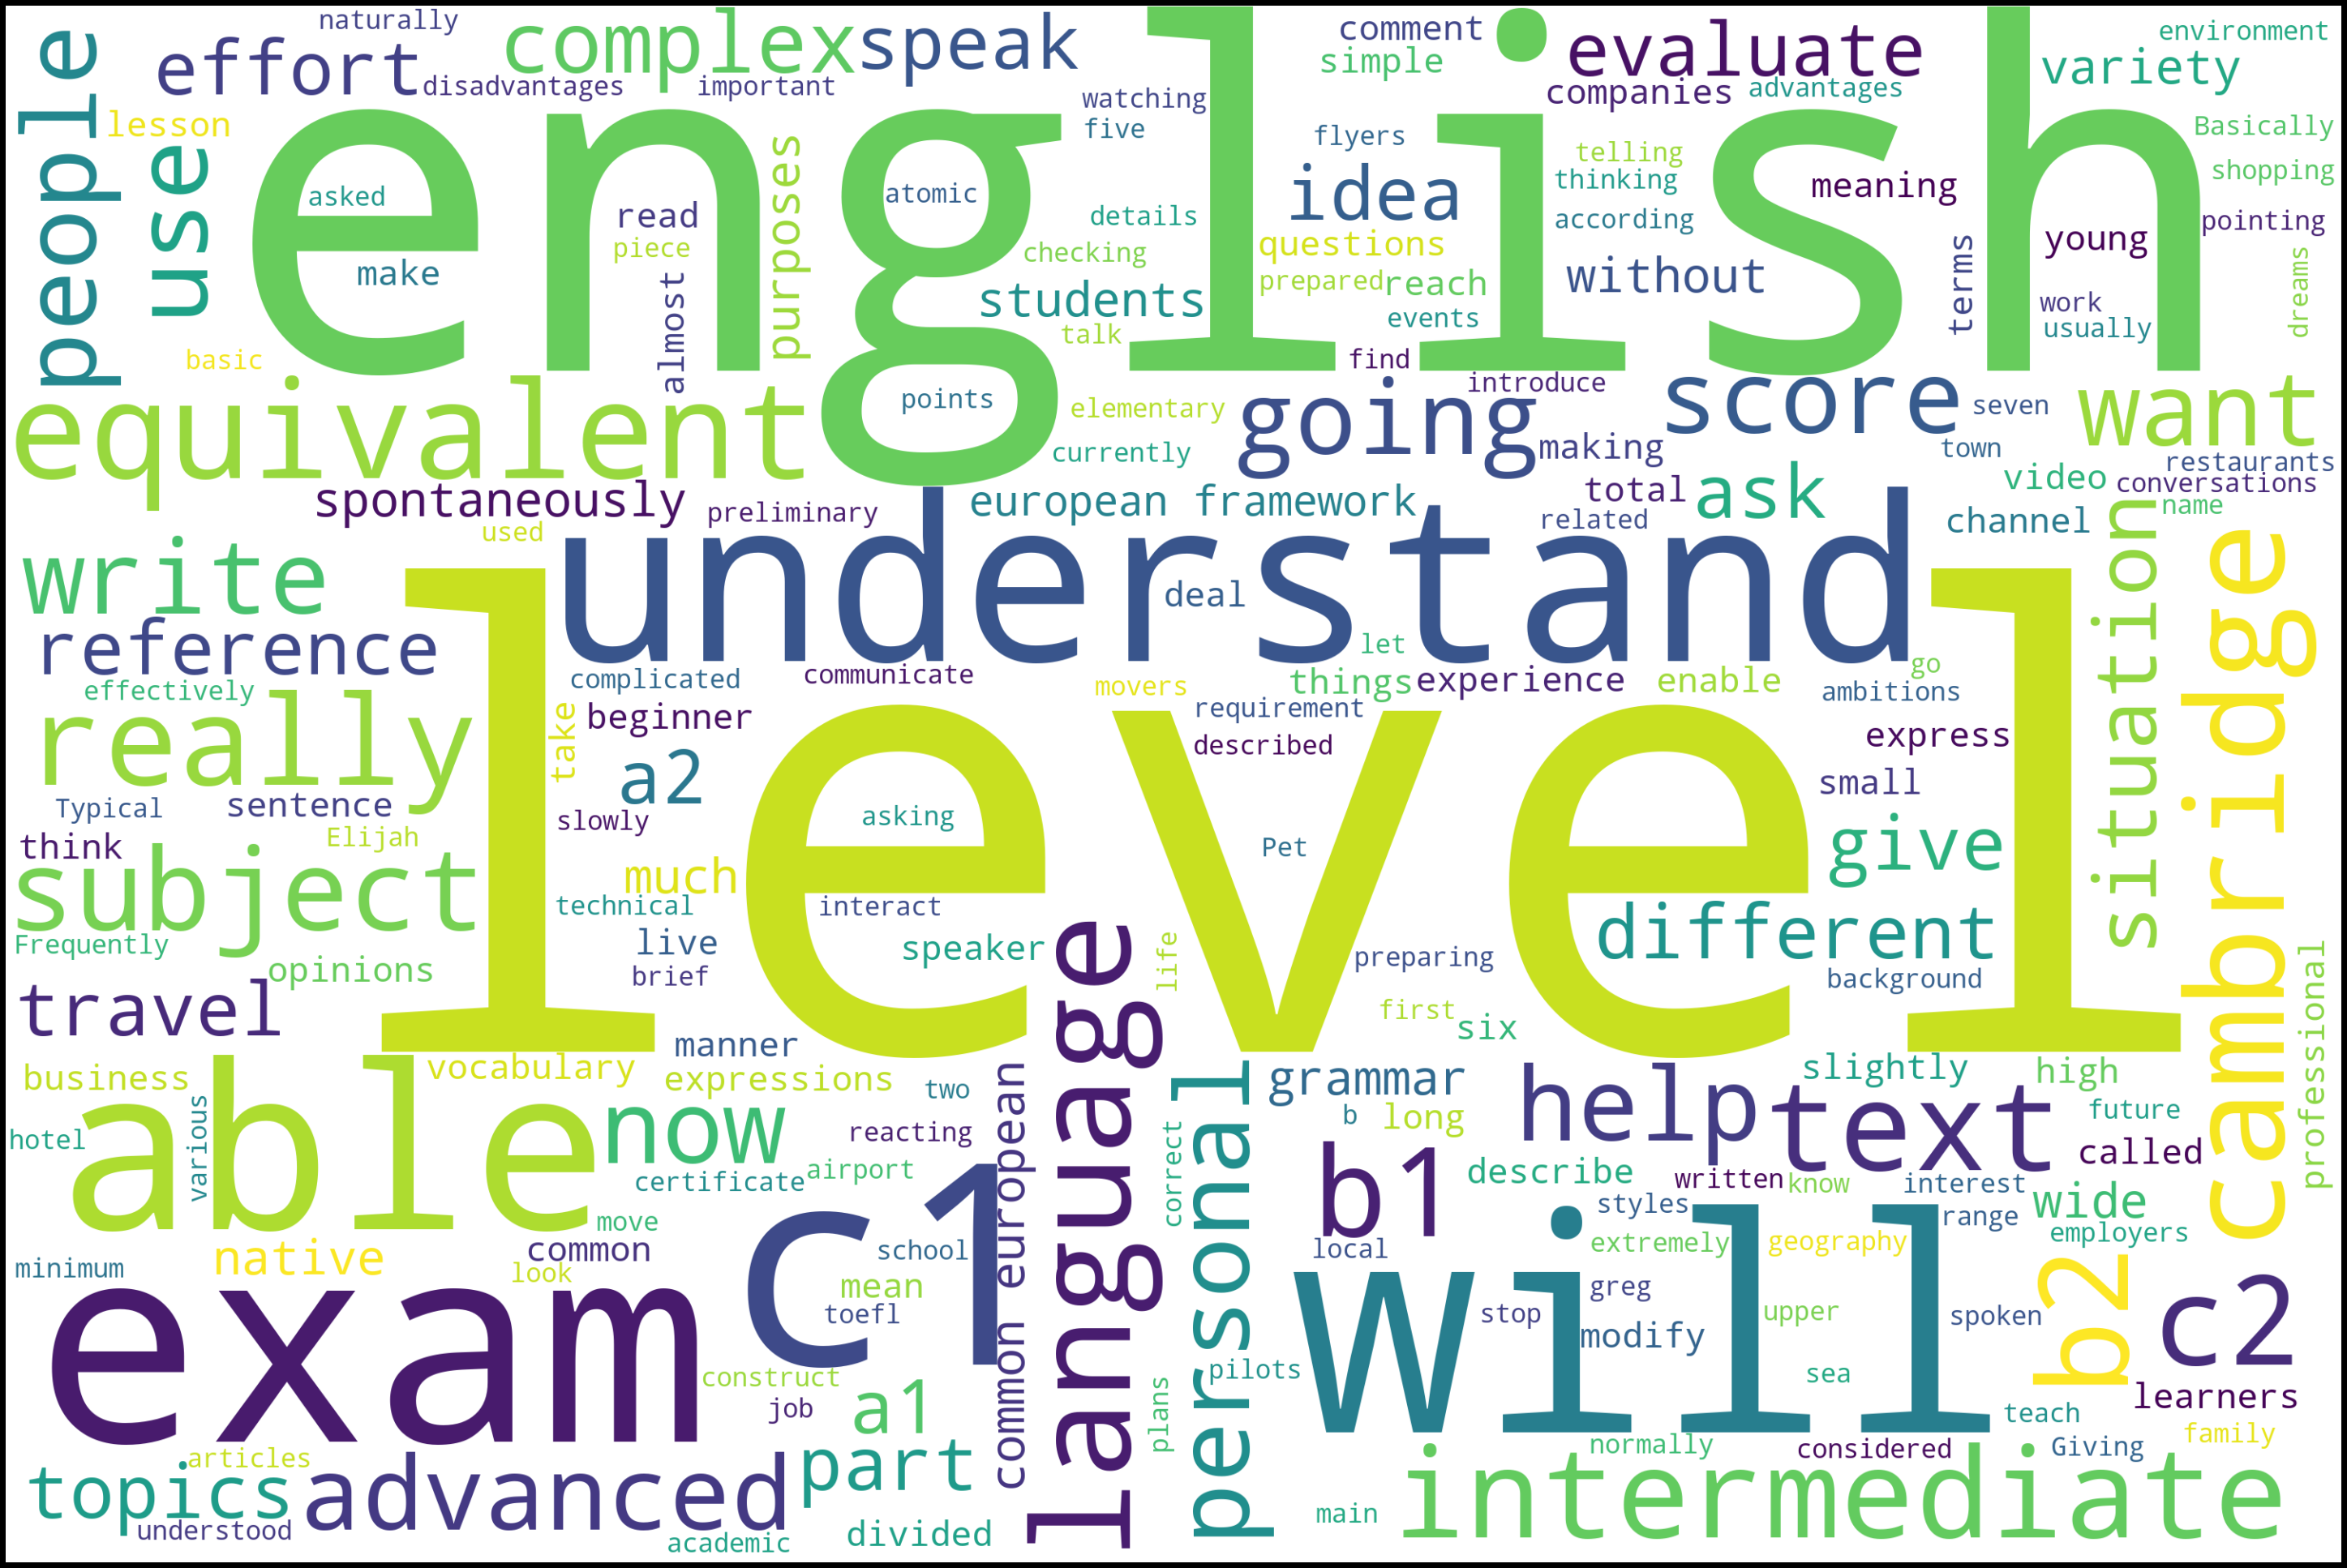

In [27]:
#from wordcloud import WordCloud, STOPWORDS

# Sem StopWords:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white').generate(str(Text_EN))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

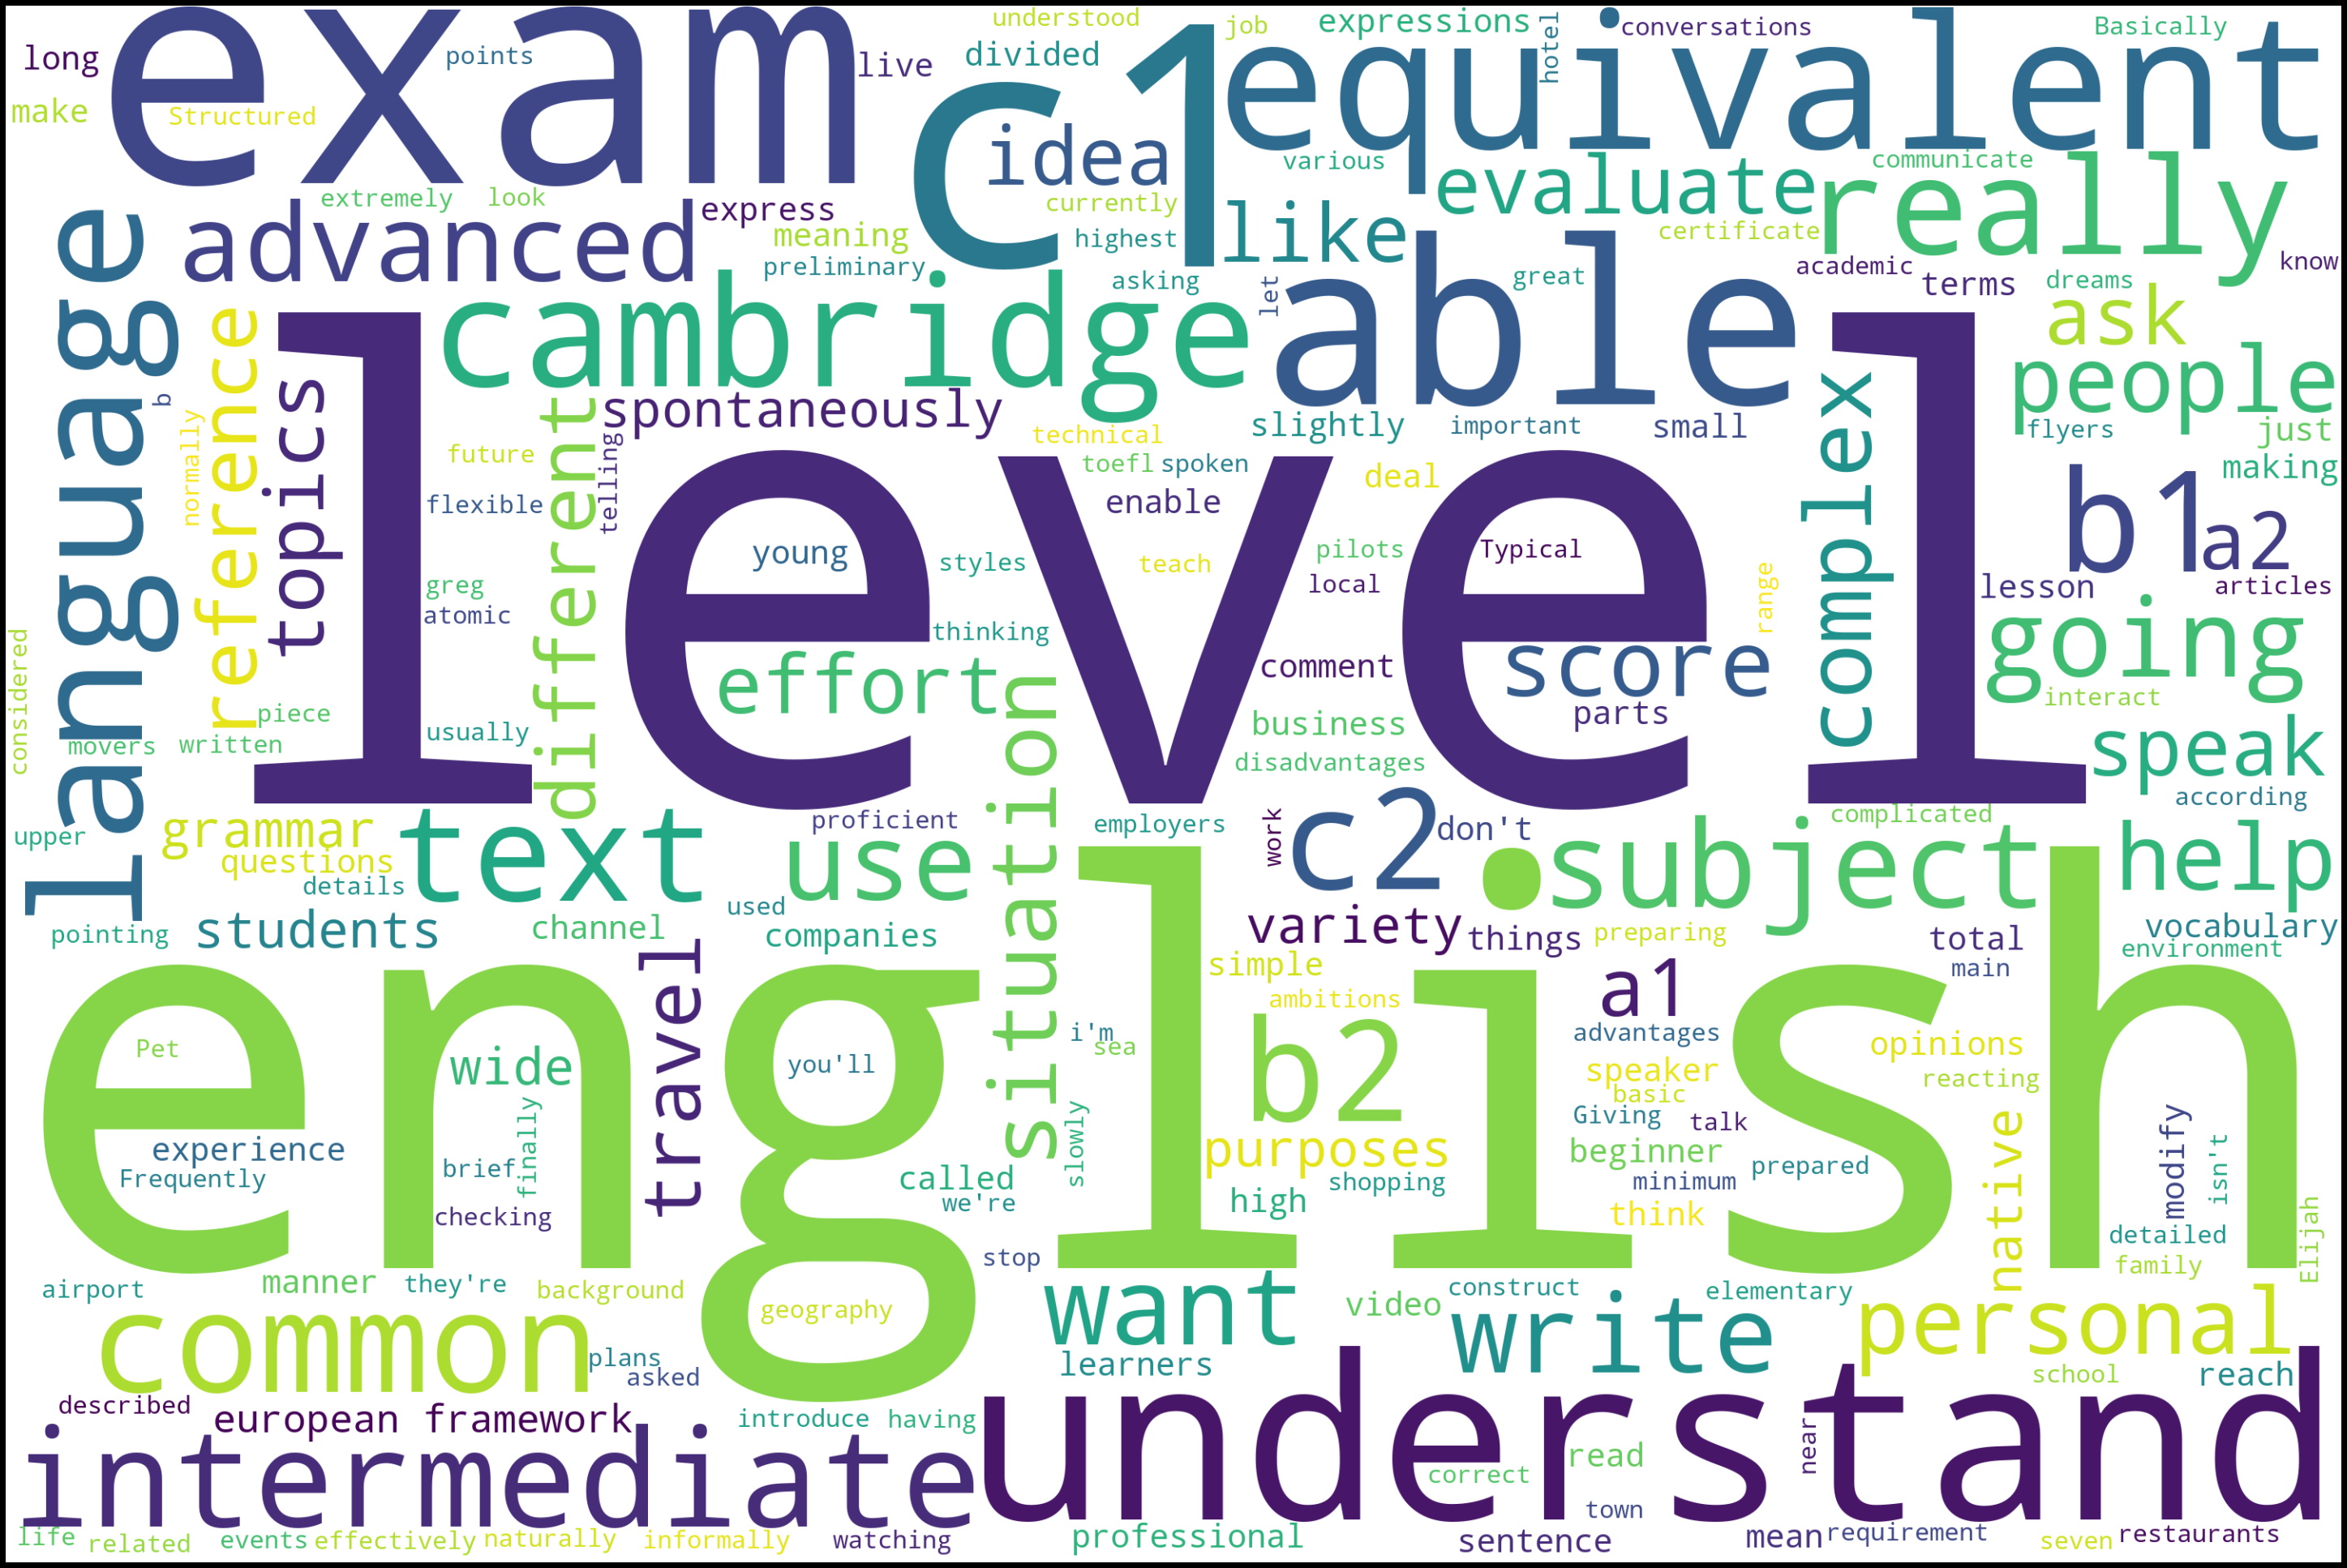

In [28]:
#Exclude Stop_Words:

STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "said","you", "your", "yours", "yourself"])

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOP_WORDS).generate(str(Text_EN))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

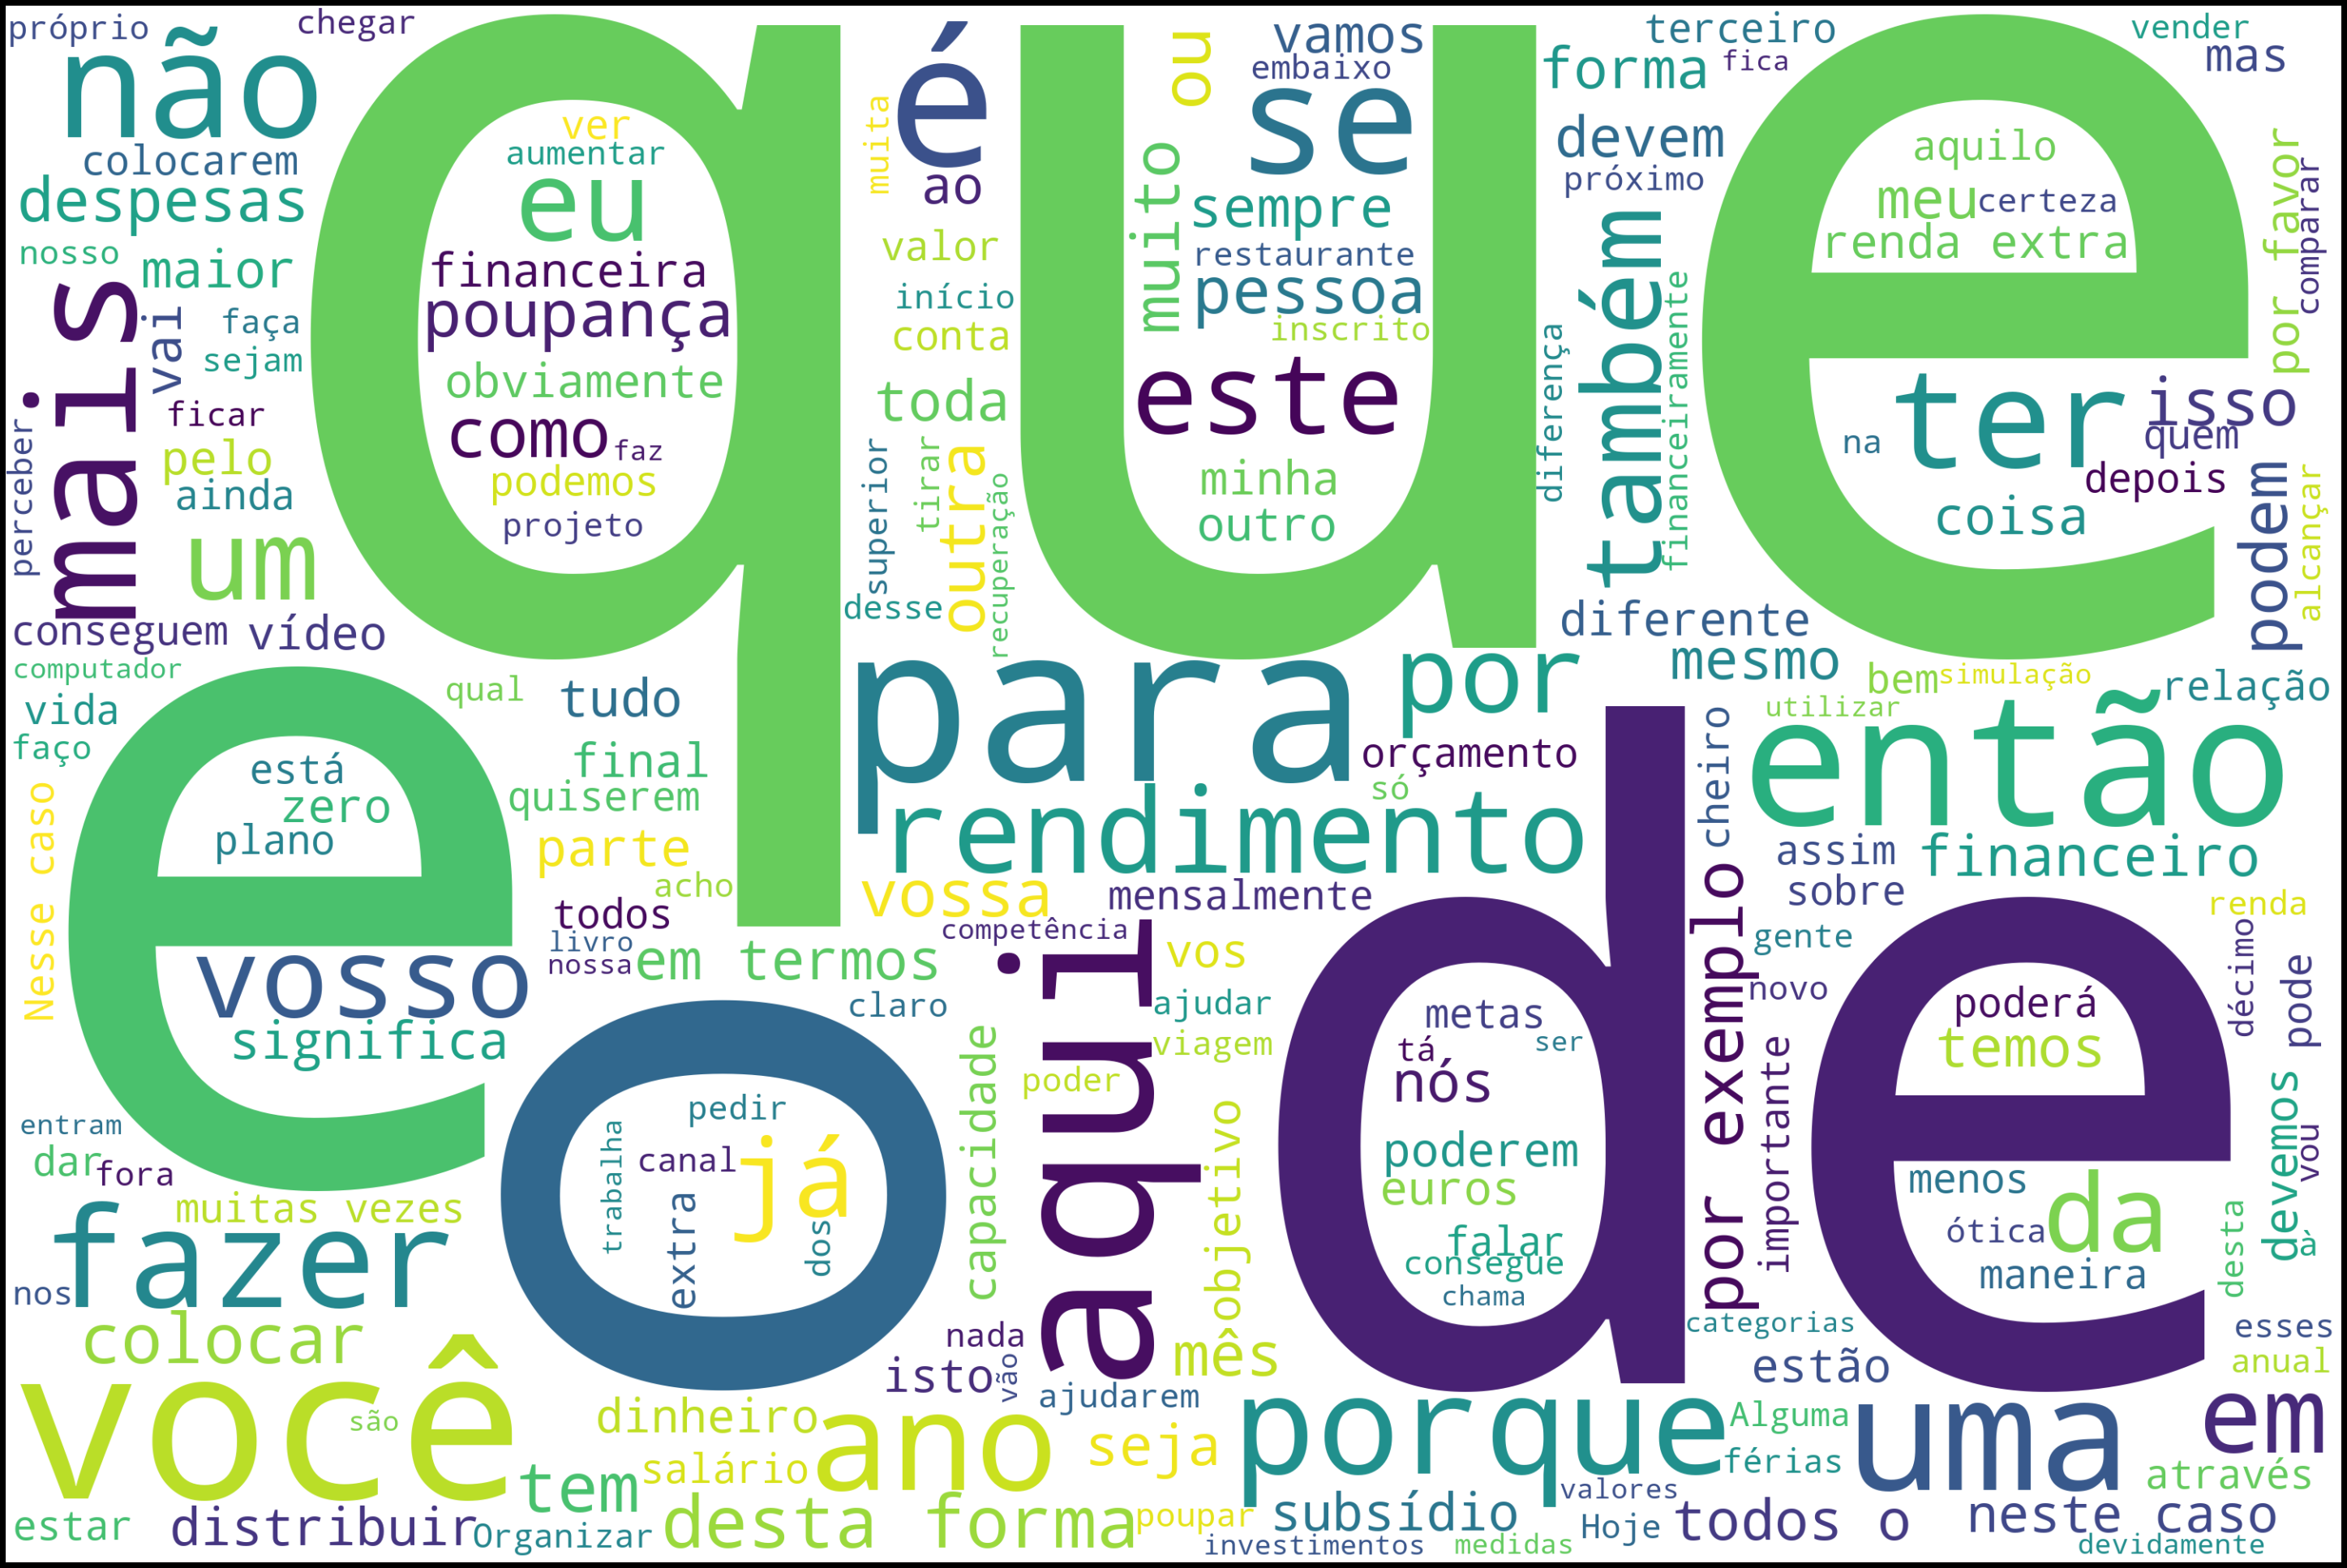

In [24]:
#from wordcloud import WordCloud, STOPWORDS

# Sem StopWords:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white').generate(str(Text_PT))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

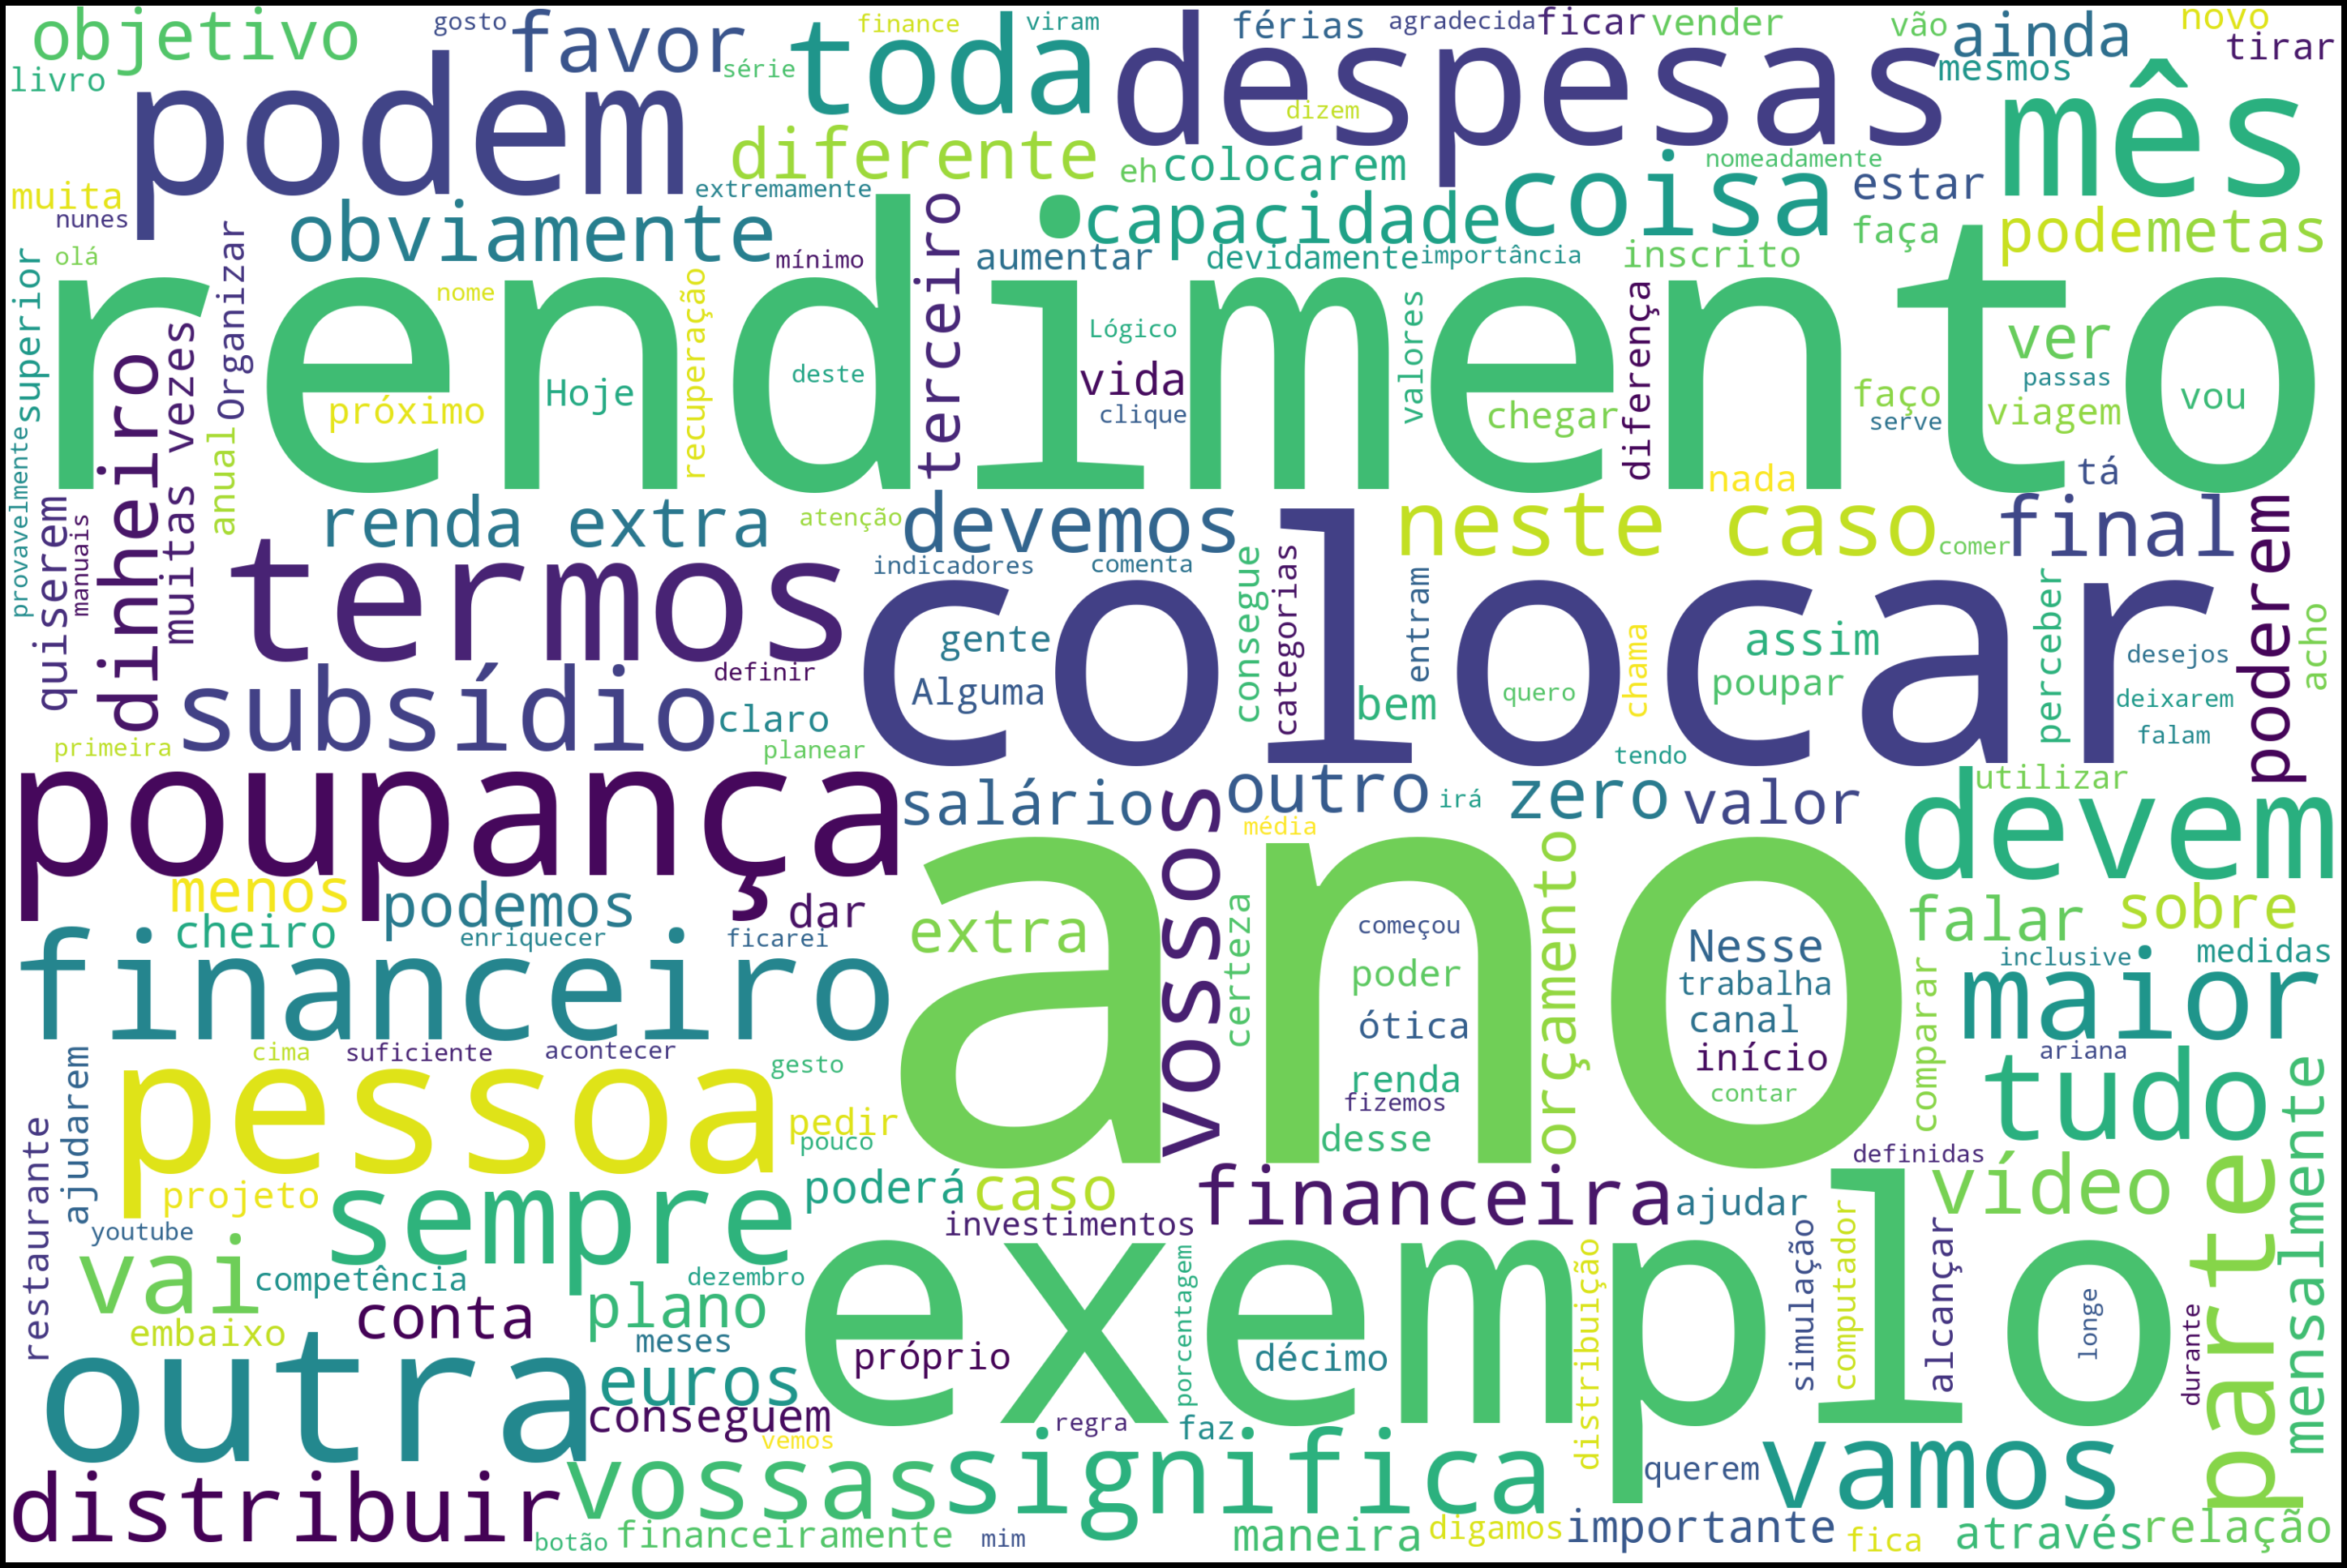

In [32]:
#Exclude PT Stop_Words:

STOP_WORDS = frozenset([
    "de","a","o","que","e","do","da","em","um","para","é","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam",
    "então","aqui","vosso","vossa","porque","fazer","desta","forma","todos"])

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOP_WORDS).generate(str(Text_PT))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()